<a href="https://colab.research.google.com/github/giovanirojascuela/2025_5TO01/blob/main/TALLER/EVALUACION/JACKSON_PAMPA_EVA_PARTE01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Análisis y Preparación de Datos

In [43]:
import pandas as pd

# Cargar los archivos CSV
df1 = pd.read_csv('index_1.csv')
df2 = pd.read_csv('index_2.csv')

# Unir los datasets en un solo DataFrame
df = pd.concat([df1, df2], ignore_index=True)

# Mostrar las primeras filas
print(df.head())


         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  


#Realizar Análisis Exploratorio de Datos (EDA) utilizando visualizaciones para entender los patrones.

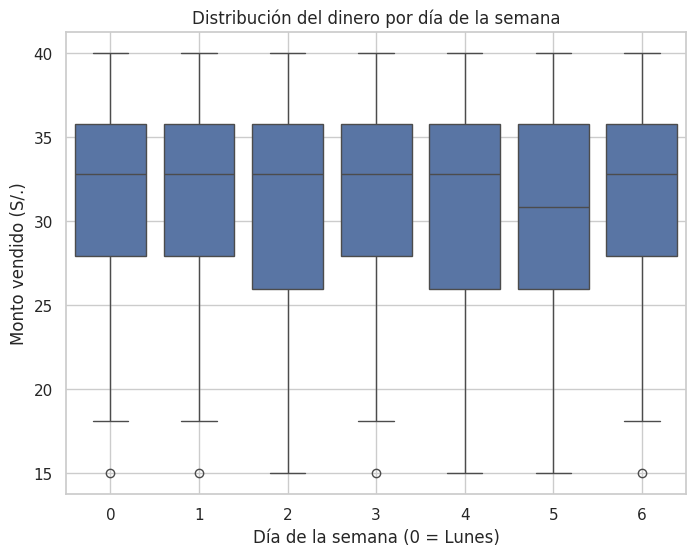

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='dia_semana', y='money')
plt.title('Distribución del dinero por día de la semana')
plt.xlabel('Día de la semana (0 = Lunes)')
plt.ylabel('Monto vendido (S/.)')
plt.grid(True)
plt.show()


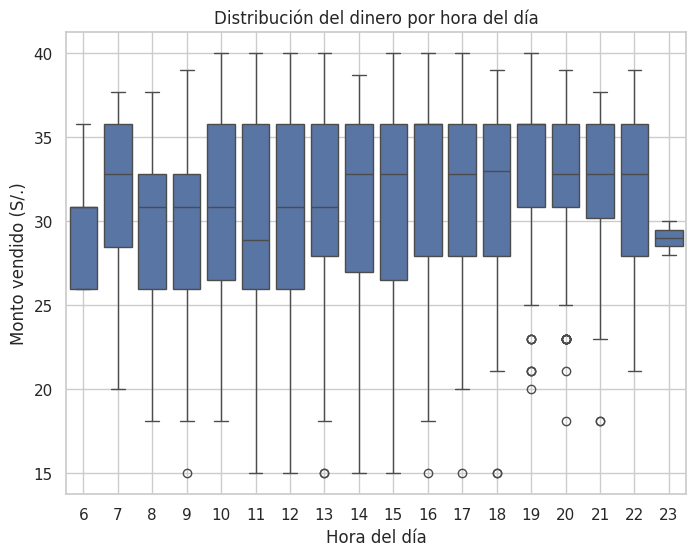

In [53]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='hora', y='money')
plt.title('Distribución del dinero por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Monto vendido (S/.)')
plt.grid(True)
plt.show()


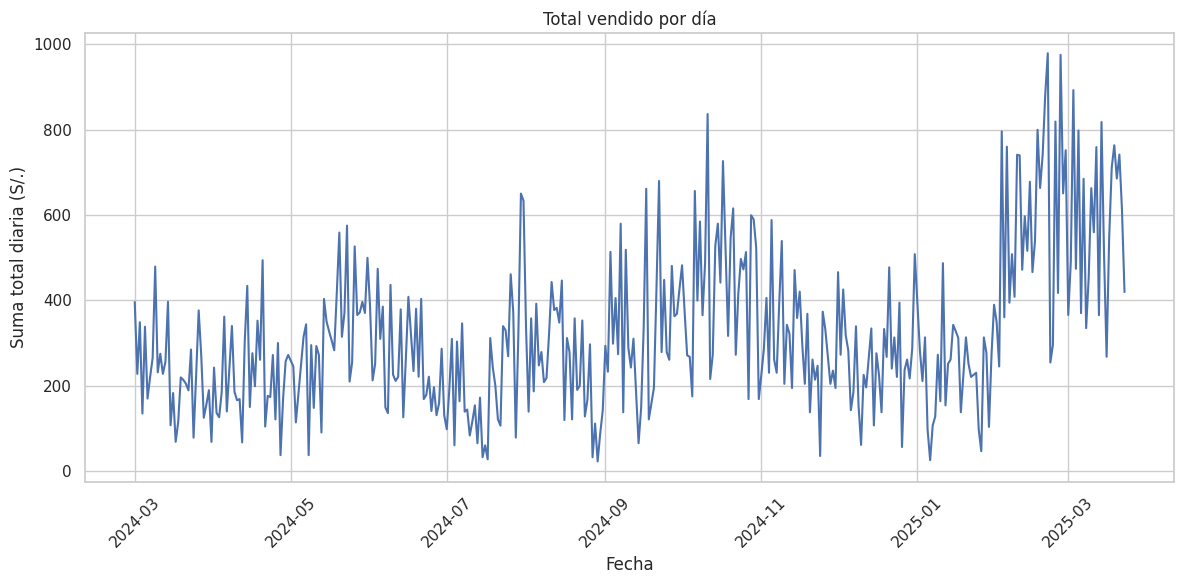

In [54]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=ventas_dia, x='fecha', y='cantidad_total_vendida_no_dia')
plt.title('Total vendido por día')
plt.xlabel('Fecha')
plt.ylabel('Suma total diaria (S/.)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


#Ingeniería de Características: Extraer mes, día de la semana, hora del datetime. Crear cantidad_total_vendida_no_dia (suma de money por día). Codificar variables categóricas (e.g., One-Hot Encoding).

In [45]:
# Asegurar formato datetime (si no lo hiciste ya)
df['datetime'] = pd.to_datetime(df['datetime'], format='mixed', errors='coerce')

# Extraer mes, día de la semana, hora
df['mes'] = df['datetime'].dt.month
df['dia_semana'] = df['datetime'].dt.dayofweek  # 0=Lunes
df['hora'] = df['datetime'].dt.hour
df['fecha'] = df['datetime'].dt.date

# Crear variable: cantidad total vendida por día
ventas_dia = df.groupby('fecha')['money'].sum().reset_index(name='cantidad_total_vendida_no_dia')
df = df.merge(ventas_dia, on='fecha')

# Codificar variables categóricas (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=['cash_type', 'coffee_name'], drop_first=True)

# Eliminar columnas que ya no sirven o no se usan en el modelo
df_encoded = df_encoded.drop(columns=['date', 'datetime', 'card', 'fecha'])

# Verificar el resultado
df_encoded.head()


,money,dia_semana,hora,cantidad_total_vendida_no_dia_x,mes,cantidad_total_vendida_no_dia_y,cash_type_cash,coffee_name_Americano with Milk,coffee_name_Americano with milk,coffee_name_Cappuccino,...,coffee_name_Hot milkshake,coffee_name_Irish whiskey,coffee_name_Irish whiskey with milk,coffee_name_Irish with chocolate,coffee_name_Latte,coffee_name_Mochaccino,coffee_name_Super chocolate,coffee_name_Tea,coffee_name_Vanilla coffee,coffee_name_Vanilla with Irish whiskey
0,38.7,4,10,396.3,3,396.3,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,38.7,4,12,396.3,3,396.3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,38.7,4,12,396.3,3,396.3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,28.9,4,13,396.3,3,396.3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,38.7,4,13,396.3,3,396.3,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


#Dividir los datos en conjuntos de entrenamiento y prueba.

In [47]:
# Aseguramos que esté la columna antes de codificar
ventas_dia = df.groupby('fecha')['money'].sum().reset_index(name='cantidad_total_vendida_no_dia')
df = df.merge(ventas_dia, on='fecha')

# Ahora codificamos Y NOS ASEGURAMOS de no eliminar la columna objetivo
df_encoded = pd.get_dummies(df, columns=['cash_type', 'coffee_name'], drop_first=True)

# Eliminamos columnas innecesarias, pero dejamos cantidad_total_vendida_no_dia
df_encoded = df_encoded.drop(columns=['date', 'datetime', 'card', 'fecha'], errors='ignore')


In [48]:
X = df_encoded.drop(columns=['cantidad_total_vendida_no_dia'])
y_total = df_encoded['cantidad_total_vendida_no_dia']
y_producto = df['money']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train_total, y_test_total = train_test_split(X, y_total, test_size=0.2, random_state=42)
_, _, y_train_producto, y_test_producto = train_test_split(X, y_producto, test_size=0.2, random_state=42)


#Construir y entrenar un modelo de red neuronal (utilizando TensorFlow Keras) para prever la cantidad_total_vendida_no_dia.

In [49]:
# Escalar los datos (normalizar para que la red aprenda mejor)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo con Keras (modelo simple)
import tensorflow as tf
from tensorflow.keras import layers, Sequential

model = Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)  # salida de regresión (un número)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train_total, epochs=30, batch_size=32, validation_split=0.2, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 225975.3438 - mae: 427.8820 - val_loss: 228853.7188 - val_mae: 430.1288
Epoch 2/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 216238.1562 - mae: 419.7690 - val_loss: 220079.6406 - val_mae: 421.5029
Epoch 3/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 204135.3281 - mae: 408.5579 - val_loss: 197392.2969 - val_mae: 399.3802
Epoch 4/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 181130.2344 - mae: 384.7572 - val_loss: 155549.9219 - val_mae: 355.5783
Epoch 5/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 137819.9688 - mae: 336.8019 - val_loss: 100550.1562 - val_mae: 287.1859
Epoch 6/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 85046.4453 - mae: 265.4229 - val_loss: 50507.7188 - val_mae: 202.1540
Epoch 7/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39282.0312 - mae: 179.8814 - val_loss: 21804.8984 - val_mae: 123.8705
Epoch 8/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15155.2930 - mae: 106.5239 - val_lo

#Construir y entrenar otro modelo (con TensorFlow Keras) para prever la cantidad_vendida por coffee_name (o un enfoque multi-output).

In [50]:
# Usamos los mismos datos escalados: X_train_scaled y X_test_scaled
# Pero cambiamos la variable objetivo: ahora usamos y_train_producto y y_test_producto

# Creamos el modelo
model_producto = tf.keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)  # salida de regresión
])

# Compilar
model_producto.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar
history_producto = model_producto.fit(X_train_scaled, y_train_producto, epochs=30, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 962.2238 - mae: 30.6123 - val_loss: 752.5026 - val_mae: 26.9166
Epoch 2/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 661.2911 - mae: 25.1227 - val_loss: 248.8913 - val_mae: 15.0832
Epoch 3/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 162.2460 - mae: 11.5072 - val_loss: 26.8783 - val_mae: 4.0057
Epoch 4/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24.1039 - mae: 3.3233 - val_loss: 16.3848 - val_mae: 2.8447
Epoch 5/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16.6894 - mae: 2.6939 - val_loss: 13.8539 - val_mae: 2.4656
Epoch 6/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.7357 - mae: 2.3334 - val_loss: 12.4385 - val_mae: 2.1915
Epoch 7/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.5649 - mae: 2.0051 - val_loss: 11.4104 - val_mae: 1.9642
Epoch 8/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.3449 - mae: 1.7151 - val_loss: 10.7001 - val_mae: 1.7864
Epoch 9/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/ste

#Evaluar los modelos utilizando métricas de regresión (MAE, MSE, RMSE, R²).

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

#  Predecir con ambos modelos
y_pred_total = model.predict(X_test_scaled).flatten()
y_pred_producto = model_producto.predict(X_test_scaled).flatten()

#  Métricas para modelo 1 (total vendido por día)
print(" Modelo 1: Predicción de cantidad_total_vendida_no_dia")
mae_total = mean_absolute_error(y_test_total, y_pred_total)
mse_total = mean_squared_error(y_test_total, y_pred_total)
rmse_total = np.sqrt(mse_total)
r2_total = r2_score(y_test_total, y_pred_total)

print(f"MAE: {mae_total:.2f}")
print(f"MSE: {mse_total:.2f}")
print(f"RMSE: {rmse_total:.2f}")
print(f"R²: {r2_total:.4f}\n")

# Métricas para modelo 2 (monto por producto)
print(" Modelo 2: Predicción de money por coffee_name")
mae_prod = mean_absolute_error(y_test_producto, y_pred_producto)
mse_prod = mean_squared_error(y_test_producto, y_pred_producto)
rmse_prod = np.sqrt(mse_prod)
r2_prod = r2_score(y_test_producto, y_pred_producto)

print(f"MAE: {mae_prod:.2f}")
print(f"MSE: {mse_prod:.2f}")
print(f"RMSE: {rmse_prod:.2f}")
print(f"R²: {r2_prod:.4f}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
 Modelo 1: Predicción de cantidad_total_vendida_no_dia
MAE: 29.51
MSE: 4275.96
RMSE: 65.39
R²: 0.9084

 Modelo 2: Predicción de money por coffee_name
MAE: 0.60
MSE: 3.31
RMSE: 1.82
R²: 0.8770


#Guardar el/los modelo/s entrenado/s de Keras (en formato .h5 o SavedModel) y los pre-procesadores (escaladores, codificadores de scikit-learn) utilizando pickle o joblib.

In [55]:
# Guardar modelo que predice el total vendido por día
model.save('modelo_total.h5')

# Guardar modelo que predice el monto por producto
model_producto.save('modelo_producto.h5')


In [56]:
import pickle

# Guardar el escalador (StandardScaler)
with open('escalador.pkl', 'wb') as f:
    pickle.dump(scaler, f)



In [57]:
# Guardar las columnas originales de X (importante para futuras predicciones)
with open('columnas.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)


In [58]:
from google.colab import files

files.download('modelo_total.h5')
files.download('modelo_producto.h5')
files.download('escalador.pkl')
files.download('columnas.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>